In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
training_path = 'trainingset.p'
test_path = 'testset.p'

x_train_orig, y_train_orig = pickle.load(open(training_path, "rb"))
x_test_orig, y_test_orig = pickle.load(open(test_path, "rb"))

print("Ready")

Ready


In [3]:
print("Training set shape: ", x_train_orig.shape)
print("Test set shape: ", x_test_orig.shape)
print("Training set datatype: ", x_train_orig.dtype)
print("Test set datatype: ", x_test_orig.dtype)

Training set shape:  (39209, 32, 32, 3)
Test set shape:  (12630, 32, 32, 3)
Training set datatype:  uint8
Test set datatype:  uint8


In [4]:
# Shuffle the data and change the datatype to float
def shuffledata(x,y):
    shuffleindices = np.arange(len(x))
    np.random.shuffle(shuffleindices)
    x_new = np.array(x[shuffleindices]).astype(np.float32)
    y_new = np.array(y[shuffleindices])
    return x_new, y_new
    
x_train, y_train = shuffledata(x_train_orig, y_train_orig)
x_test, y_test = shuffledata(x_test_orig, y_test_orig)

In [5]:
# See that the data has been properly shuffled
print(y_train[0:100])

[ 9  5 14  7 18 17  2  4 40 25 12  5 22 42  1 38 31 22  1 17 33 40 25 38  1
  8 40 38  8 36 31 16 29 33 17  4  8  5  7  4 20  1 12 13 22 33  6  1 25 40
  5 10  3 38 15  7  4  1 34 10 42 10 31  2 12  4 11 38 11 18  1 11 12  4 41
  7 39 11 38  4 33  8  4 14  2 38 10  8  3  2 25 31 40  2  1 38  8 18  3  5]


In [6]:
# Define a simple function for normalization
def normalize_color(image_set):
    return (image_set - 128.0)/255.0

# Normalize the images in the training and the test set
x_train_normalized = normalize_color(x_train)
x_test_normalized = normalize_color(x_test)

In [7]:
# Print out some information about the normalized training set
print(x_train_normalized.shape)
print(x_train_normalized.dtype)
#plt.imshow(x_train_normalized[0])
print(x_train_normalized.std())
print(x_train_normalized.min())
print(x_train_normalized.max())

(39209, 32, 32, 3)
float32
0.270745
-0.501961
0.498039


In [8]:
# Define a function for converting data into grayscale
def into_grayscale(image_set):
    return np.mean(image_set, -1)

# Get the normalized images in grayscale
x_train_gray = into_grayscale(x_train_normalized)
x_test_gray = into_grayscale(x_test_normalized)
# expand the array dimension to conform with tensorflow input shape
x_train_gray = np.expand_dims(x_train_gray, axis=-1)
x_test_gray = np.expand_dims(x_test_gray, axis=-1)

In [9]:
# Print out some information about the grayscale-transformed training set
print(x_train_gray.dtype)
#plt.imshow(x_train_gray[2000].squeeze())))
print(x_train_gray.shape)
print(x_train_gray.std())
print(x_train_gray.min())
print(x_train_gray.max())

float32
(39209, 32, 32, 1)
0.26324
-0.488889
0.498039


In [10]:
# Get the sign names from the csv
signnames = pd.read_csv('signnames.csv')
# Print out the sign names
signnames

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


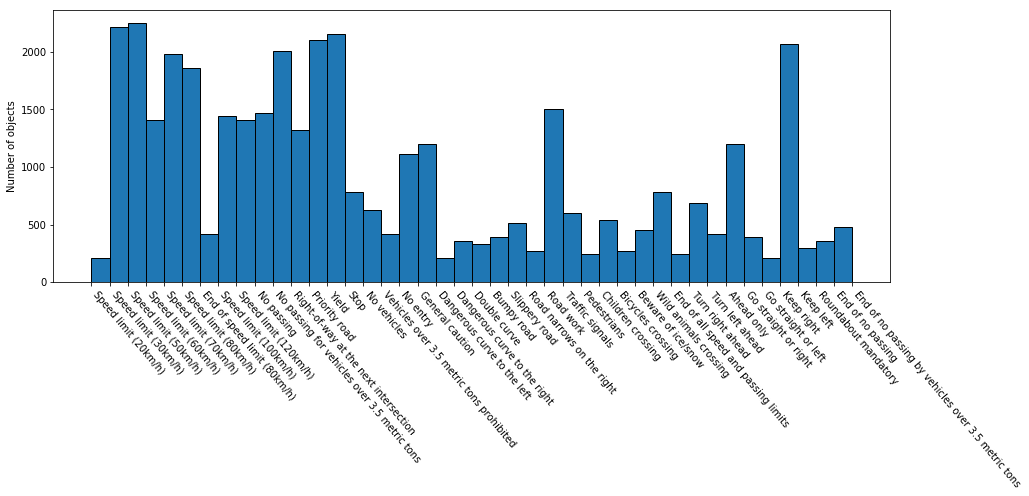

In [11]:
# Visualize the class distribution in the training set
labels = np.array(signnames.SignName)

plt.figure(figsize=(15,5))
n, bins, patches = plt.hist(y_train, bins=np.arange(43), edgecolor='black')

_,_ = plt.xticks(bins, labels, rotation=-50, ha='left')
plt.ylabel("Number of objects")
#plt.margins(0.2)
#plt.subplots_adjust(bottom=0.15)


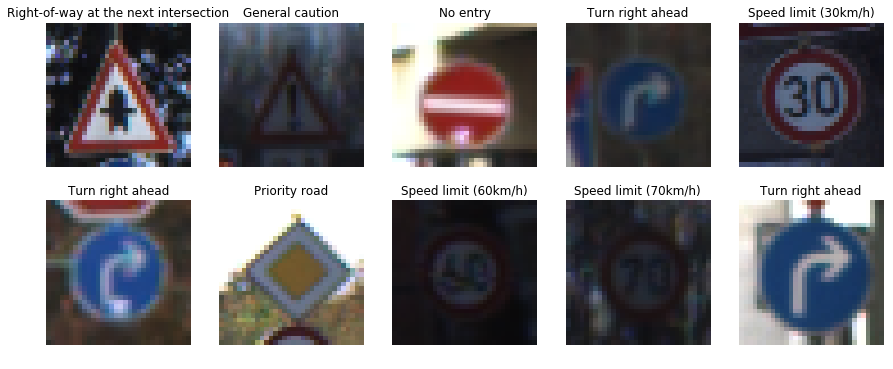

In [12]:
# Visualize some of the training set images
%matplotlib inline

fig, axes = plt.subplots(2,5, figsize=(15, 6))
axes = axes.ravel()
for i in range(10):
    ind = np.random.randint(0, x_train.shape[0])
    image = x_train[ind]
    axes[i].imshow(image.astype(np.uint8))
    axes[i].axis('off')
    axes[i].set_title(signnames.SignName[y_train[ind]])

In [13]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Lambda
from keras.layers import concatenate, Input
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import ModelCheckpoint
from keras import backend as K
print('ready')

Using TensorFlow backend.


ready


In [14]:
# Define the number of classes
num_classes = 43

In [15]:
# Convert the class labels into one-hot representation
y_train_categorical = keras.utils.to_categorical(y_train, num_classes)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes)

In [16]:
def get_model_LeNet_color():
    # This is a LeNet-5 type model with color input image
    model = Sequential()
    
    model.add(Conv2D(6, kernel_size=(5,5), activation='relu', padding='valid', input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(16, kernel_size=(5,5), activation='relu', padding='valid'))
    model.add(MaxPooling2D(pool_size=(2,2)))        
    model.add(Dropout(0.2))
              
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(84, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [17]:
def get_model_LeNet():
    # This is a LeNet-5 type model with grayscale input image
    model = Sequential()
    
    model.add(Conv2D(6, kernel_size=(5,5), activation='relu', padding='valid', input_shape=(32,32,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(16, kernel_size=(5,5), activation='relu', padding='valid'))
    model.add(MaxPooling2D(pool_size=(2,2)))        
    model.add(Dropout(0.2))
              
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(84, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [18]:
checkpoint_lenet = ModelCheckpoint(filepath='weights_lenet.hdf5',
                                   monitor="val_acc",
                                   save_best_only=True)
model_lenet = get_model_LeNet()
model_lenet.compile(loss='categorical_crossentropy',
                    optimizer=keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
                    metrics=['accuracy'])

In [19]:
model_lenet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
__________

In [20]:
history = model_lenet.fit(x_train_gray, y_train_categorical,
                batch_size=128,
                epochs=20,
                validation_split=0.2,
                callbacks=[checkpoint_lenet])

Train on 31367 samples, validate on 7842 samples
Epoch 1/20
31367/31367 [==============================] - 4s - loss: 3.5019 - acc: 0.0675 - val_loss: 3.3684 - val_acc: 0.1071
Epoch 2/20
31367/31367 [==============================] - 1s - loss: 3.1443 - acc: 0.1542 - val_loss: 2.3465 - val_acc: 0.3945
Epoch 3/20
31367/31367 [==============================] - 1s - loss: 1.9769 - acc: 0.4238 - val_loss: 1.1670 - val_acc: 0.6662
Epoch 4/20
31367/31367 [==============================] - 1s - loss: 1.2792 - acc: 0.6076 - val_loss: 0.7185 - val_acc: 0.8125
Epoch 5/20
31367/31367 [==============================] - 1s - loss: 0.9715 - acc: 0.6961 - val_loss: 0.5669 - val_acc: 0.8416
Epoch 6/20
31367/31367 [==============================] - 1s - loss: 0.7567 - acc: 0.7636 - val_loss: 0.3465 - val_acc: 0.9132
Epoch 7/20
31367/31367 [==============================] - 1s - loss: 0.6409 - acc: 0.8022 - val_loss: 0.2731 - val_acc: 0.9374
Epoch 8/20
31367/31367 [==============================] - 1s -

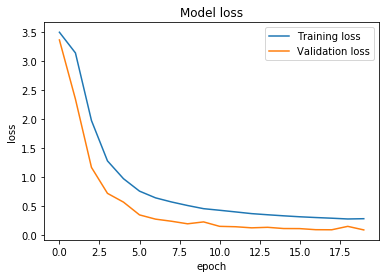

In [21]:
# Visualize the training and validation losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

In [22]:
# Load the model with the best validation accuracy
model_lenet.load_weights('weights_lenet.hdf5')
# Test the accuracy of the network in the test set
predicted_lenet = model_lenet.predict(x_test_gray)
predicted_lenet_classes = predicted_lenet.argmax(axis=-1)
print("Test set accuracy: ", sum(y_test == predicted_lenet_classes)/len(y_test))

Test set accuracy:  0.927711797308


In [24]:
checkpoint_lenet_color = ModelCheckpoint(filepath='weights_lenet_color.hdf5',
                                   monitor="val_acc",
                                   save_best_only=True)
model_lenet_color = get_model_LeNet_color()
model_lenet_color.compile(loss='categorical_crossentropy',
                    optimizer=keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
                    metrics=['accuracy'])

In [25]:
history = model_lenet_color.fit(x_train_normalized, y_train_categorical,
                batch_size=128,
                epochs=20,
                validation_split=0.2,
                callbacks=[checkpoint_lenet_color])

Train on 31367 samples, validate on 7842 samples
Epoch 1/20
31367/31367 [==============================] - 1s - loss: 3.1979 - acc: 0.1558 - val_loss: 2.2656 - val_acc: 0.3744
Epoch 2/20
31367/31367 [==============================] - 1s - loss: 1.7312 - acc: 0.4785 - val_loss: 0.9695 - val_acc: 0.6998
Epoch 3/20
31367/31367 [==============================] - 1s - loss: 1.1200 - acc: 0.6477 - val_loss: 0.5855 - val_acc: 0.8490
Epoch 4/20
31367/31367 [==============================] - 1s - loss: 0.8316 - acc: 0.7364 - val_loss: 0.4433 - val_acc: 0.8787
Epoch 5/20
31367/31367 [==============================] - 1s - loss: 0.6690 - acc: 0.7877 - val_loss: 0.3677 - val_acc: 0.8980
Epoch 6/20
31367/31367 [==============================] - 1s - loss: 0.5828 - acc: 0.8162 - val_loss: 0.2942 - val_acc: 0.9378
Epoch 7/20
31367/31367 [==============================] - 1s - loss: 0.4919 - acc: 0.8446 - val_loss: 0.1853 - val_acc: 0.9524
Epoch 8/20
31367/31367 [==============================] - 1s -

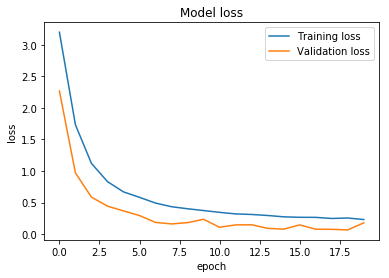

In [26]:
# Visualize the training and validation losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

In [27]:
# Load the model with the best validation accuracy
model_lenet_color.load_weights('weights_lenet_color.hdf5')
# Test the accuracy of the network in the test set
predicted_lenet_color = model_lenet_color.predict(x_test_normalized)
predicted_lenet_color_classes = predicted_lenet_color.argmax(axis=-1)
print("Test set accuracy: ", sum(y_test == predicted_lenet_color_classes)/len(y_test))

Test set accuracy:  0.933966745843


In [37]:
def get_model_deepcnn():
    # The architecture is modified from:
    # http://bakeaselfdrivingcar.blogspot.fi/2017/08/project-2-traffic-sign-recognition-with.html
    # The network does not contain the spatial transformer net originally used.
    
    model = Sequential()
    
    model.add(Conv2D(10, (1,1), padding='same', input_shape=(32,32,3)))
    model.add(LeakyReLU(alpha=0.5))
    model.add(BatchNormalization())
    
    model.add(Conv2D(3, (1,1), padding='same'))
    model.add(LeakyReLU(alpha=0.5))
    model.add(BatchNormalization())
    
    model.add(Conv2D(16, (5,5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Conv2D(32, (5,5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (5,5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Conv2D(96, (5,5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Conv2D(128, (5,5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Conv2D(192, (5,5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(256, (5,5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(128, (5,5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (5,5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(8,8)))
    
    model.add(Flatten())
    
    model.add(Dropout(0.2))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [38]:
checkpoint_deepcnn = ModelCheckpoint(filepath='weights_deepcnn.hdf5',
                                     monitor="val_acc",
                                     save_best_only=True)
model_deepcnn = get_model_deepcnn()
model_deepcnn.compile(loss='categorical_crossentropy',
                      optimizer=keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
                      metrics=['accuracy'])

In [39]:
model_deepcnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 10)        40        
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 32, 32, 10)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 10)        40        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 3)         33        
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 32, 32, 3)         0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 16)        1216      
__________

In [40]:
history = model_deepcnn.fit(x_train_normalized, y_train_categorical,
                     batch_size=128,
                     epochs=20,
                     validation_split=0.2,
                     callbacks=[checkpoint_deepcnn])

Train on 31367 samples, validate on 7842 samples
Epoch 1/20
31367/31367 [==============================] - 54s - loss: 2.6360 - acc: 0.2932 - val_loss: 3.1114 - val_acc: 0.1783
Epoch 2/20
31367/31367 [==============================] - 53s - loss: 0.9122 - acc: 0.7135 - val_loss: 0.8266 - val_acc: 0.7618
Epoch 3/20
31367/31367 [==============================] - 53s - loss: 0.2132 - acc: 0.9321 - val_loss: 0.0842 - val_acc: 0.9726
Epoch 4/20
31367/31367 [==============================] - 53s - loss: 0.0847 - acc: 0.9738 - val_loss: 0.0805 - val_acc: 0.9744
Epoch 5/20
31367/31367 [==============================] - 53s - loss: 0.0514 - acc: 0.9840 - val_loss: 0.0194 - val_acc: 0.9945
Epoch 6/20
31367/31367 [==============================] - 53s - loss: 0.0383 - acc: 0.9887 - val_loss: 0.2476 - val_acc: 0.9457
Epoch 7/20
31367/31367 [==============================] - 53s - loss: 0.0253 - acc: 0.9929 - val_loss: 0.0228 - val_acc: 0.9941
Epoch 8/20
31367/31367 [==============================]

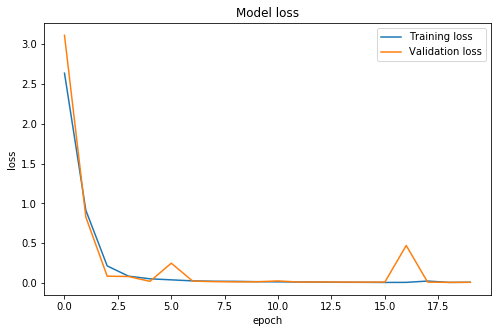

In [43]:
# Visualize the training and validation losses
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

In [44]:
# Load the model with the best validation accuracy
model_deepcnn.load_weights('weights_deepcnn.hdf5')
# Test the accuracy of the network in the test set
predicted_deepcnn = model_deepcnn.predict(x_test_normalized)
predicted_deepcnn_classes = predicted_deepcnn.argmax(axis=-1)
print("Test set accuracy: ", sum(y_test == predicted_deepcnn_classes)/len(y_test))

Test set accuracy:  0.965954077593


In [45]:
# Now, train the best model according to validation data with the full training set
model_deepcnn_full = get_model_deepcnn()
model_deepcnn_full.compile(loss='categorical_crossentropy',
                           optimizer=keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
                           metrics=['accuracy'])

In [46]:
history = model_deepcnn_full.fit(x_train_normalized, y_train_categorical,
                     batch_size=128,
                     epochs=20)

Epoch 1/20
39209/39209 [==============================] - 60s - loss: 2.7137 - acc: 0.2673    
Epoch 2/20
39209/39209 [==============================] - 62s - loss: 0.5487 - acc: 0.8258    
Epoch 3/20
39209/39209 [==============================] - 64s - loss: 0.1256 - acc: 0.9598    
Epoch 4/20
39209/39209 [==============================] - 64s - loss: 0.0616 - acc: 0.9817    
Epoch 5/20
39209/39209 [==============================] - 62s - loss: 0.0382 - acc: 0.9887    
Epoch 6/20
39209/39209 [==============================] - 62s - loss: 0.0269 - acc: 0.9927    
Epoch 7/20
39209/39209 [==============================] - 62s - loss: 0.0222 - acc: 0.9933    
Epoch 8/20
39209/39209 [==============================] - 62s - loss: 0.0159 - acc: 0.9955    
Epoch 9/20
39209/39209 [==============================] - 62s - loss: 0.0130 - acc: 0.9960    
Epoch 10/20
39209/39209 [==============================] - 62s - loss: 0.0134 - acc: 0.9961    
Epoch 11/20
39209/39209 [========================

In [48]:
import time
# Test the accuracy of the network in the test set
start = time.time()
predicted_deepcnn_full = model_deepcnn_full.predict(x_test_normalized)
stop = time.time()
predicted_deepcnn_classes_full = predicted_deepcnn_full.argmax(axis=-1)
print("Test set accuracy: ", sum(y_test == predicted_deepcnn_classes_full)/len(y_test))
print("Prediction time: {}".format(stop-start))

Test set accuracy:  0.976405384006
Prediction time: 7.354088544845581


In [50]:
# Test the prediction performance
times = []
random_indices = np.random.randint(0, len(y_test), size=(1000,))
for ind in random_indices:
    start = time.time()
    temp = model_deepcnn_full.predict(np.expand_dims(x_test_normalized[ind], axis=0))
    stop = time.time()
    times.append(stop-start)
    
print("Average prediction time per image: {}".format(np.mean(times)))
print("Standard deviation of prediction time per image: {}".format(np.std(times)))

Average prediction time per image: 0.005669627904891968
Standard deviation of prediction time per image: 0.001096450636278277


In [51]:
# Get the weights of the first two 5x5 convolution layers
layer6_weights = model_deepcnn.layers[6].get_weights()[0]
layer9_weights = model_deepcnn.layers[9].get_weights()[0]

The weights of the first 5x5 convolutional layer
(5, 5, 3, 16)


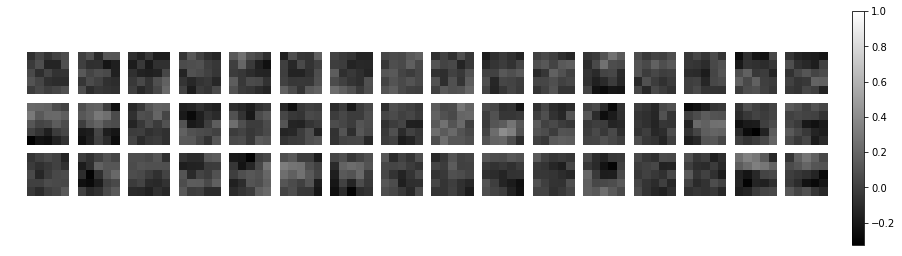

In [53]:
def visualize_weights(weights, figuresize=(15,6)):
    print(weights.shape)
    rows = weights.shape[2]
    cols = weights.shape[3]
    kernel_width = weights.shape[0]
    padding = 1
    image = np.ones(shape=(rows*kernel_width + padding*rows, cols*kernel_width + padding*cols))
    
    for i in range(rows):
        for j in range(cols):
            kernel_image = weights[:,:,i,j]
            i_start = i*(kernel_width+padding)
            j_start = j*(kernel_width+padding)
            image[i_start:i_start+kernel_width, j_start:j_start+kernel_width] = kernel_image
       
    plt.figure(figsize=figuresize)
    im = plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.colorbar(im,fraction=0.014, pad=0.02)print("The weights of the second 5x5 convolutional layer")
visualize_weights(layer9_weights, figuresize=(20,10))
                    
print("The weights of the first 5x5 convolutional layer")
visualize_weights(layer6_weights, figuresize=(15,5))

The weights of the second 5x5 convolutional layer
(5, 5, 16, 32)


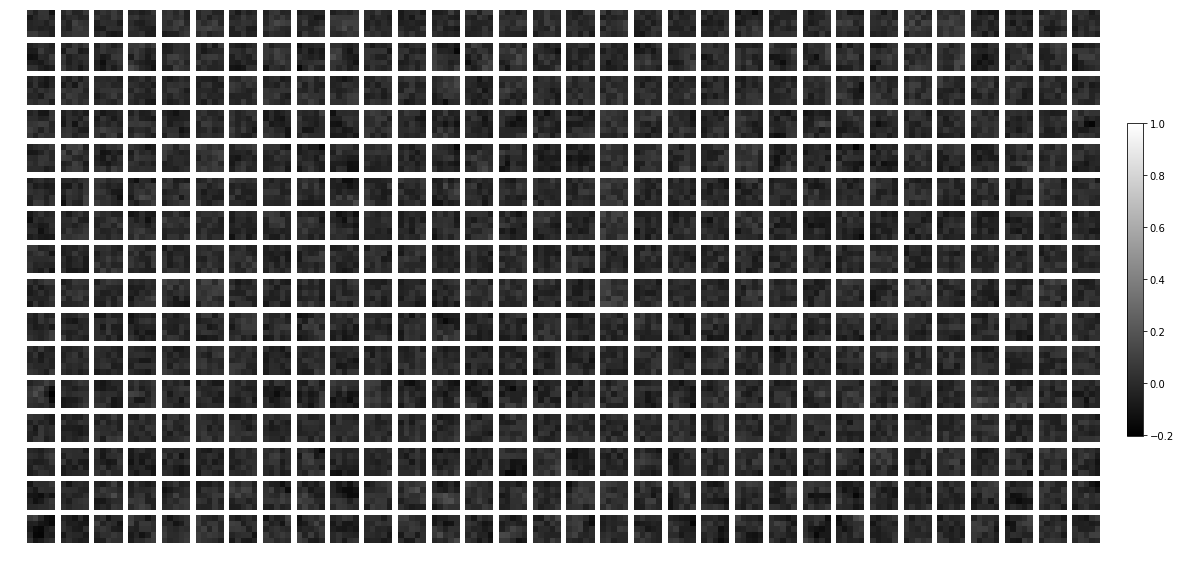

In [54]:
print("The weights of the second 5x5 convolutional layer")
visualize_weights(layer9_weights, figuresize=(20,10))

(-0.5, 31.5, 31.5, -0.5)

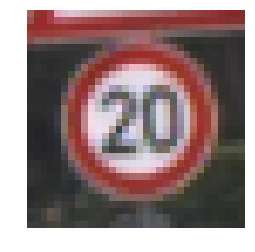

In [122]:
# Select a test image to visualize the activations with
test_image_idx = 41
test_image = x_test_normalized[test_image_idx]
plt.imshow(test_image + 0.5)
plt.axis('off')

In [123]:
# Source: https://github.com/philipperemy/keras-visualize-activations/blob/master/read_activations.py
def get_activations(model, model_inputs, print_shape_only=False, layer_name=None):
    print('----- activations -----')
    activations = []
    inp = model.input

    model_multi_inputs_cond = True
    if not isinstance(inp, list):
        # only one input! let's wrap it in a list.
        inp = [inp]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None]  # all layer outputs

    funcs = [K.function(inp + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(0.)
    else:
        list_inputs = [model_inputs, 0.]

    # Learning phase. 0 = Test mode (no dropout or batch normalization)
    # layer_outputs = [func([model_inputs, 0.])[0] for func in funcs]
    layer_outputs = [func(list_inputs)[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if print_shape_only:
            print(layer_activations.shape)
        else:
            print(layer_activations)
    return activations


In [124]:
# Get the activations for the first three 5x5 convolution layers
activations_layer6 = get_activations(model_deepcnn, [test_image],
                                     print_shape_only=True,
                                     layer_name=model_deepcnn.layers[6].name)

activations_layer9 = get_activations(model_deepcnn, [test_image],
                                     print_shape_only=True,
                                     layer_name=model_deepcnn.layers[9].name)

activations_layer12 = get_activations(model_deepcnn, [test_image],
                                     print_shape_only=True,
                                     layer_name=model_deepcnn.layers[12].name)

----- activations -----
(1, 32, 32, 16)
----- activations -----
(1, 32, 32, 32)
----- activations -----
(1, 32, 32, 64)


In [125]:
def visualize_activations(activations, rows, cols, figuresize=(15,6)):
    actv = np.array(activations)
    actv = actv.squeeze()
    print(actv.shape)
    
    width = actv.shape[0]
    padding = 2
    image = np.ones(shape=(rows*width + padding*rows, cols*width + padding*cols))*actv.max()
    
    for i in range(rows):
        for j in range(cols):
            actv_image = actv[:,:,i*cols+j]
            i_start = i*(width+padding)
            j_start = j*(width+padding)
            image[i_start:i_start+width, j_start:j_start+width] = actv_image
       
    plt.figure(figsize=figuresize)
    im = plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.colorbar(im,fraction=0.012, pad=0.02)
    

(32, 32, 16)


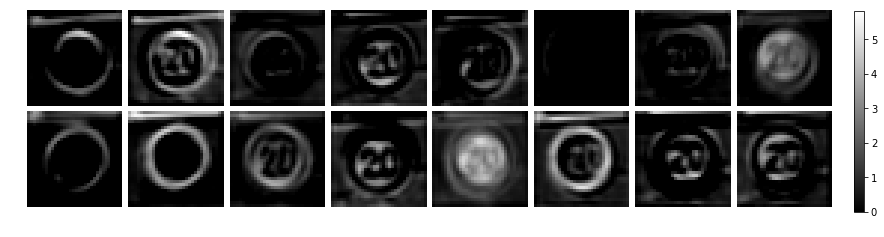

In [126]:
# Visualize the activations of the first 5x5 convolution layer
visualize_activations(activations_layer6, 2, 8, figuresize=(15,15))

(32, 32, 32)


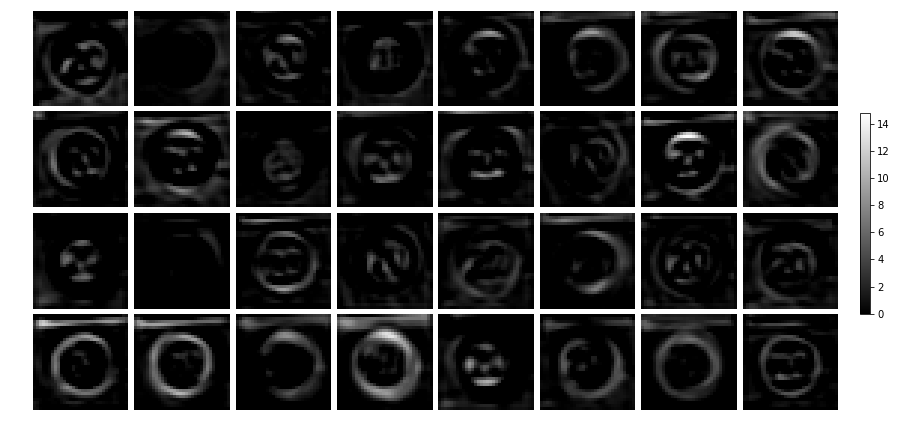

In [127]:
# Visualize the activations of the second 5x5 convolution layer
visualize_activations(activations_layer9, 4, 8, figuresize=(15,15))

(32, 32, 64)


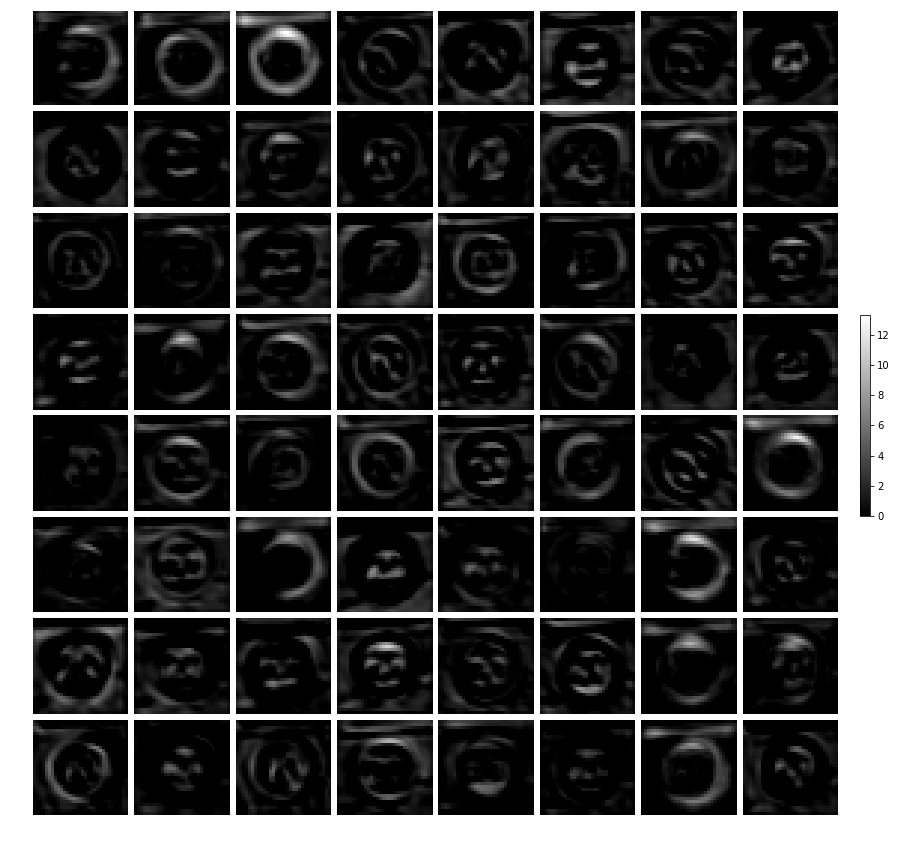

In [128]:
# Visualize the activations of the third 5x5 convolution layer
visualize_activations(activations_layer12, 8, 8, figuresize=(15,15))